In [5]:
from __future__ import division
import numpy as np


class RandomProcess(object):
    def reset_states(self):
        pass


class AnnealedGaussianProcess(RandomProcess):
    def __init__(self, mu, sigma, sigma_min, n_steps_annealing):
        self.mu = mu
        self.sigma = sigma
        self.n_steps = 0

        if sigma_min is not None:
            self.m = -float(sigma - sigma_min) / float(n_steps_annealing)
            self.c = sigma
            self.sigma_min = sigma_min
        else:
            self.m = 0.
            self.c = sigma
            self.sigma_min = sigma

    @property
    def current_sigma(self):
        sigma = max(self.sigma_min, self.m * float(self.n_steps) + self.c)
        return sigma


class GaussianWhiteNoiseProcess(AnnealedGaussianProcess):
    def __init__(self, mu=0., sigma=1., sigma_min=None, n_steps_annealing=1000, size=1):
        super(GaussianWhiteNoiseProcess, self).__init__(mu=mu, sigma=sigma, sigma_min=sigma_min, n_steps_annealing=n_steps_annealing)
        self.size = size

    def sample(self):
        sample = np.random.normal(self.mu, self.current_sigma, self.size)
        self.n_steps += 1
        return sample

# Based on http://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
class OrnsteinUhlenbeckProcess(AnnealedGaussianProcess):
    def __init__(self, theta, mu=0., sigma=1., dt=1e-2, size=1, sigma_min=None, n_steps_annealing=1000):
        super(OrnsteinUhlenbeckProcess, self).__init__(mu=mu, sigma=sigma, sigma_min=sigma_min, n_steps_annealing=n_steps_annealing)
        self.theta = theta
        self.mu = mu
        self.dt = dt
        self.size = size
        self.reset_states()

    def sample(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.current_sigma * np.sqrt(self.dt) * np.random.normal(size=self.size)
        self.x_prev = x
        self.n_steps += 1
        return x

    def reset_states(self):
        self.x_prev = np.random.normal(self.mu,self.current_sigma,self.size)

random_process = OrnsteinUhlenbeckProcess(theta=0.15, mu=0, sigma=0.2,
                                          size=1)


In [18]:
value = []
for i in range(10000000):
    value.append(random_process.sample()[0])

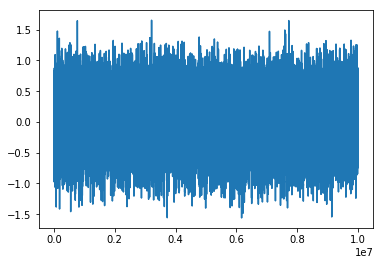

In [19]:
import matplotlib.pyplot as plt
plt.plot(value)
plt.show()